In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [84]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [85]:
file_1 = '대한민국 도시별 기후.csv'

In [86]:
df1 = pd.read_csv(file_1, encoding = 'UTF-8')

In [87]:
df1.head()

,지점,지점명,일시,평균기온(℃),평균최고\n기온(℃),평균최저\n기온(℃),강수량(mm),평균풍속\n(m/s),최대풍속\n(m/s),평균습도(%rh),최저습도(%rh),일조합(hr),일조율(%)
0,105,강릉,1970-01,-1.2,4.3,-5.1,10.1,4.4,12.3,52,18,195.8,64.18
1,105,강릉,1970-02,2.2,6.7,-1.9,58.8,4.3,15.7,53,17,173.3,57.52
2,105,강릉,1970-03,2.4,7.0,-1.8,11.8,4.0,11.7,53,20,232.9,63.01
3,105,강릉,1970-04,11.4,16.8,6.2,1.0,3.2,14.3,63,15,195.4,49.71
4,105,강릉,1970-05,17.7,22.1,13.6,78.4,2.7,15.0,68,17,171.3,39.01


In [88]:
df1.tail()

,지점,지점명,일시,평균기온(℃),평균최고\n기온(℃),평균최저\n기온(℃),강수량(mm),평균풍속\n(m/s),최대풍속\n(m/s),평균습도(%rh),최저습도(%rh),일조합(hr),일조율(%)
10283,184,제주,2023-03,12.3,16.4,8.5,49.6,2.7,8.8,66,26,211.1,56.84
10284,184,제주,2023-04,15.5,19.4,11.8,62.1,3.6,14.0,69,14,204.1,52.27
10285,184,제주,2023-05,19.1,23.1,16.0,269.3,2.7,8.7,77,28,180.3,41.87
10286,184,제주,2023-06,23.4,26.7,20.4,213.0,3.1,10.9,76,29,170.2,39.51
10287,184,제주,2023-07,28.1,31.4,25.6,273.2,3.0,10.8,75,39,124.6,28.43


In [89]:
df1['지점명'].value_counts()

지점명
강릉    643
서울    643
인천    643
수원    643
서산    643
청주    643
대전    643
포항    643
군산    643
대구    643
울산    643
광주    643
부산    643
통영    643
여수    643
제주    643
Name: count, dtype: int64

In [90]:
def change_local(string):
    if '강릉' == string:
        return '강원특별자치도'
    elif '서울' == string:
        return '서울특별시'
    elif '제주' == string:
        return '제주도'
    elif '여수' == string:
        return '전라남도'
    elif '부산' == string:
        return '부산광역시'
    elif '광주' == string:
        return '광주광역시'
    elif '울산' == string:
        return '울산광역시'
    elif '대구' == string:
        return '대구광역시'
    elif '인천' == string:
        return '인천광역시'
    elif '수원' == string:
        return '경기도'
    elif '서산' == string:
        return '충청남도'
    elif '청주' == string:
        return '충청북도'
    elif '대전' == string:
        return '대전광역시'
    elif '포항' == string:
        return '경상북도'
    elif '군산' == string:
        return '전라북도'
    else:
        return '경상남도'

In [91]:
df1['지점명'] = df1['지점명'].apply(change_local)

In [92]:
df1.head()

,지점,지점명,일시,평균기온(℃),평균최고\n기온(℃),평균최저\n기온(℃),강수량(mm),평균풍속\n(m/s),최대풍속\n(m/s),평균습도(%rh),최저습도(%rh),일조합(hr),일조율(%)
0,105,강원특별자치도,1970-01,-1.2,4.3,-5.1,10.1,4.4,12.3,52,18,195.8,64.18
1,105,강원특별자치도,1970-02,2.2,6.7,-1.9,58.8,4.3,15.7,53,17,173.3,57.52
2,105,강원특별자치도,1970-03,2.4,7.0,-1.8,11.8,4.0,11.7,53,20,232.9,63.01
3,105,강원특별자치도,1970-04,11.4,16.8,6.2,1.0,3.2,14.3,63,15,195.4,49.71
4,105,강원특별자치도,1970-05,17.7,22.1,13.6,78.4,2.7,15.0,68,17,171.3,39.01


In [93]:
def check_year(df):
    return int(df[:4])

def check_month(df):
    return str(df[5:])

In [94]:
df1['year'] = df1['일시'].apply(check_year)
df1['month'] = df1['일시'].apply(check_month)

In [95]:
df1.drop([ '평균최고\n기온(℃)', '평균최저\n기온(℃)', '최대풍속\n(m/s)', '최저습도(%rh)', '일조합(hr)'], axis = 1, inplace = True)

In [96]:
df1.to_csv('대한민국_시도별_기후.csv')

In [97]:
df1.head()

,지점,지점명,일시,평균기온(℃),강수량(mm),평균풍속\n(m/s),평균습도(%rh),일조율(%),year,month
0,105,강원특별자치도,1970-01,-1.2,10.1,4.4,52,64.18,1970,01
1,105,강원특별자치도,1970-02,2.2,58.8,4.3,53,57.52,1970,02
2,105,강원특별자치도,1970-03,2.4,11.8,4.0,53,63.01,1970,03
3,105,강원특별자치도,1970-04,11.4,1.0,3.2,63,49.71,1970,04
4,105,강원특별자치도,1970-05,17.7,78.4,2.7,68,39.01,1970,05


In [98]:
df1.drop(['지점'], axis = 1, inplace = True)

In [99]:
df1_g1 = df1.drop(['일시'], axis = 1)

In [100]:
df_g1 = df1_g1.groupby(['지점명', 'year']).mean()
df_g1.head()

평균기온(℃)     강수량(mm)  평균풍속\n(m/s)  평균습도(%rh)     일조율(%)  \
지점명     year                                                             
강원특별자치도 1970  12.083333  115.616667     3.050000  65.666667  49.227500   
        1971  12.250000  117.933333     3.175000  63.583333  54.279167   
        1972  12.583333  125.800000     2.925000  65.166667  47.235000   
        1973  12.850000   83.708333     2.983333  62.833333  53.728333   
        1974  11.608333  101.691667     2.825000  64.166667  50.429167   

                                month  
지점명     year                           
강원특별자치도 1970  850253375505900765184.0  
        1971  850253375505900765184.0  
        1972  850253375505900765184.0  
        1973  850253375505900765184.0  
        1974  850253375505900765184.0

In [101]:
df_g1 = df_g1.reset_index()
df_g1

,지점명,year,평균기온(℃),강수량(mm),평균풍속\n(m/s),평균습도(%rh),일조율(%),month
0,강원특별자치도,1970,12.083333,115.616667,3.050000,65.666667,49.227500,850253375505900765184.0
1,강원특별자치도,1971,12.250000,117.933333,3.175000,63.583333,54.279167,850253375505900765184.0
2,강원특별자치도,1972,12.583333,125.800000,2.925000,65.166667,47.235000,850253375505900765184.0
3,강원특별자치도,1973,12.850000,83.708333,2.983333,62.833333,53.728333,850253375505900765184.0
4,강원특별자치도,1974,11.608333,101.691667,2.825000,64.166667,50.429167,850253375505900765184.0
...,...,...,...,...,...,...,...,...
859,충청북도,2019,14.183333,71.391667,1.300000,61.166667,55.290000,850253375505900765184.0
860,충청북도,2020,13.941667,113.216667,1.458333,62.916667,52.940000,850253375505900765184.0
861,충청북도,2021,14.350000,83.466667,1.450000,62.500000,54.182500,850253375505900765184.0
862,충청북도,2022,13.908333,103.033333,1.391667,59.500000,57.811667,850253375505900765184.0


Text(0.5, 1.0, '국내 연도별 평균기온(℃) 수치')

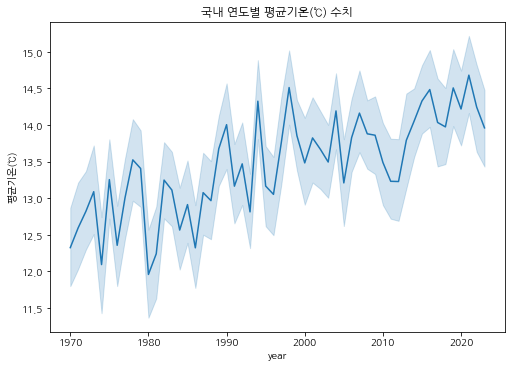

In [102]:
fig, axes = plt.subplots(figsize = (7,5),  layout = 'constrained')
sns.lineplot(data = df_g1, x = 'year', y = '평균기온(℃)', ax = axes)
axes.set_title('국내 연도별 평균기온(℃) 수치')

/home/jjam/.local/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, '상관도 Heatmap')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


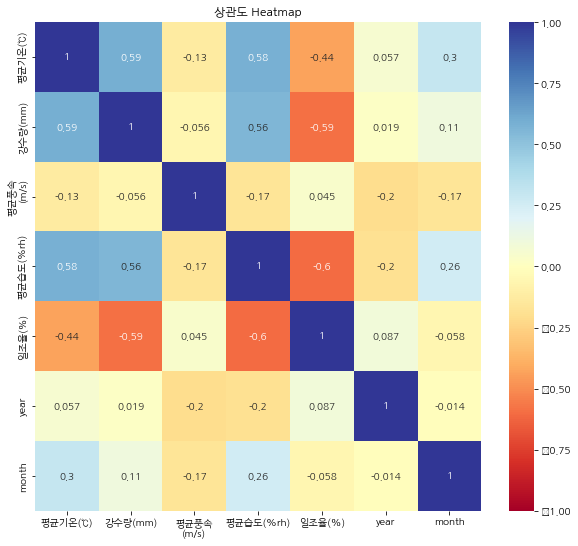

In [103]:
# 상관도를 보기위해 heatmap 
fig, axe = plt.subplots(figsize=(10,9))
axe = sns.heatmap(df1[['평균기온(℃)', '강수량(mm)', '평균풍속\n(m/s)', '평균습도(%rh)', '일조율(%)', 'year', 'month']].corr(), cmap='RdYlBu', annot=True, vmin=-1, vmax=1)
axe.set_title('상관도 Heatmap')

# (강수량, 평균풍속, 평균습도, 일조율)를 집중적으로 보자

In [104]:
# 각 col별 평균기온과 상관관계 비교 (일시, 강수량, 평균풍속, 평균습도, 일조율)
df3 = df1.iloc[:, 1:]

In [105]:
# 일시를 float화 진행
def change_day(df):
    return float(df.replace('-', '.'))

df3['날짜'] = df3['일시'].apply(change_day)

/home/jjam/.local/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, '상관도 Heatmap')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


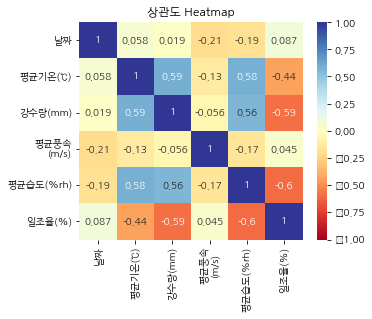

In [106]:
fig, axe = plt.subplots(figsize=(5,4))
axe = sns.heatmap(df3[['날짜', '평균기온(℃)', '강수량(mm)', '평균풍속\n(m/s)', '평균습도(%rh)', '일조율(%)']].corr(), cmap='RdYlBu', annot=True, vmin=-1, vmax=1)
axe.set_title('상관도 Heatmap')

# 그렇게 큰 상관도를 보여주지는 않는다.

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10288 entries, 0 to 10287
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         10288 non-null  object 
 1   일시          10288 non-null  object 
 2   평균기온(℃)     10288 non-null  float64
 3   강수량(mm)     10280 non-null  float64
 4   평균풍속
(m/s)  10287 non-null  float64
 5   평균습도(%rh)   10288 non-null  int64  
 6   일조율(%)      10288 non-null  float64
 7   year        10288 non-null  int64  
 8   month       10288 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 723.5+ KB


In [108]:
df1.describe()

,평균기온(℃),강수량(mm),평균풍속\n(m/s),평균습도(%rh),일조율(%),year
count,10288.000000,10280.000000,10287.000000,10288.000000,10288.000000,10288.000000
mean,13.448571,110.418794,2.638651,68.052002,50.920468,1996.293935
std,8.950301,121.667287,0.918474,10.442989,12.355367,15.470154
min,-9.800000,0.000000,0.700000,32.000000,4.840000,1970.000000
25%,5.500000,30.200000,2.000000,61.000000,43.070000,1983.000000
50%,14.200000,67.950000,2.500000,69.000000,52.020000,1996.000000
75%,21.500000,146.625000,3.200000,76.000000,59.522500,2010.000000
max,30.200000,1237.800000,6.600000,96.000000,84.670000,2023.000000


In [109]:
# 결측치 평균 대체
filter1 = df3['강수량(mm)'].isna() == True
df3['강수량(mm)'][filter1] = 67.95
df1['강수량(mm)'][filter1] = 67.95

/tmp/ipykernel_3185/1424120754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['강수량(mm)'][filter1] = 67.95
/tmp/ipykernel_3185/1424120754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['강수량(mm)'][filter1] = 67.95


In [110]:
# 결측치 평균 대체
filter1 = df3['평균풍속\n(m/s)'].isna() == True
df3['평균풍속\n(m/s)'][filter1] = 2.5
df1['평균풍속\n(m/s)'][filter1] = 2.5

/tmp/ipykernel_3185/201670445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['평균풍속\n(m/s)'][filter1] = 2.5
/tmp/ipykernel_3185/201670445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['평균풍속\n(m/s)'][filter1] = 2.5


In [111]:
df1.to_csv('대한민국_시도별_기후.csv')

In [112]:
filter2 = df3['날짜'] <= 2010
filter3 = df3['날짜'] >= 2010
before_2010 = df3[filter2]
after_2010 = df3[filter3]

In [113]:
print(before_2010)
print('')
print(after_2010)

            일시  평균기온(℃)  강수량(mm)  평균풍속\n(m/s)  평균습도(%rh)  일조율(%)  year month  \
0      1970-01     -1.2     10.1          4.4         52   64.18  1970    01   
1      1970-02      2.2     58.8          4.3         53   57.52  1970    02   
2      1970-03      2.4     11.8          4.0         53   63.01  1970    03   
3      1970-04     11.4      1.0          3.2         63   49.71  1970    04   
4      1970-05     17.7     78.4          2.7         68   39.01  1970    05   
...        ...      ...      ...          ...        ...     ...   ...   ...   
10120  2009-08     25.6    240.5          3.1         74   36.39  2009    08   
10121  2009-09     22.9    113.3          2.9         71   40.22  2009    09   
10122  2009-10     19.0     77.4          3.0         55   57.31  2009    10   
10123  2009-11     12.4    115.3          3.9         62   21.44  2009    11   
10124  2009-12      7.3     28.5          4.4         62   20.69  2009    12   

            날짜  
0      1970.01  
1    

In [114]:
# 1970년도 ~ 2000년도를 기준으로 선형모델 생성 후 예측 값 비교
X_train = before_2010[['강수량(mm)', '평균풍속\n(m/s)', '평균습도(%rh)', '일조율(%)']]
X_test = after_2010[['강수량(mm)', '평균풍속\n(m/s)', '평균습도(%rh)', '일조율(%)']]

y_train = before_2010['평균기온(℃)']
y_test = after_2010['평균기온(℃)']

In [115]:
for m in [SGDRegressor(max_iter=1000), Ridge(alpha = 0.1), 
          Lasso(alpha = 10), LinearRegression()]:
    m.fit(X_train, y_train)
    print(m.coef_) # 기울기
    print(m.intercept_) # y절편
    print('train score : ', m.score(X_train, y_train))
    print('test score : ', m.score(X_test, y_test))
    print('=================================================')
    print('')

[ 1.69643872e+10 -3.46934407e+10  3.43274874e+10  2.24052013e+10]
[3.35642901e+09]
train score :  -4.034193235263243e+23
test score :  -3.992518728548156e+23

[ 0.02999926 -0.39806039  0.31799854  0.01834543]
-11.663825283053683
train score :  0.44534554270839
test score :  0.4317696491849574

[ 0.03489367 -0.          0.17876238 -0.        ]
-2.82700859778528
train score :  0.4264284382419995
test score :  0.4131332349168899

[ 0.02999926 -0.39806622  0.31799849  0.01834544]
-11.663806734488787
train score :  0.44534554270876925
test score :  0.43176968068422605



/home/jjam/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


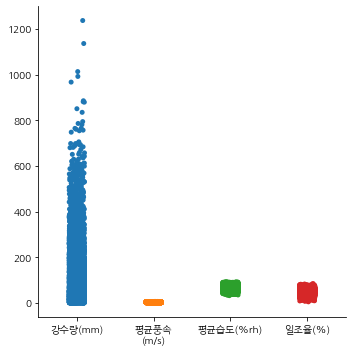

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


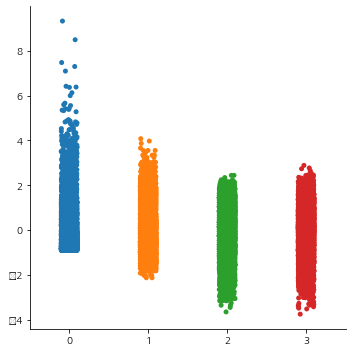

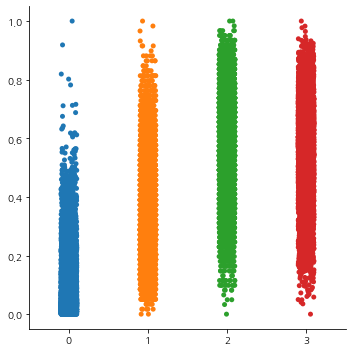

In [116]:
# 스케일 후 모델 생성
sns.catplot(X_train)

ss = StandardScaler().fit(X_train)
X_train1 = ss.transform(X_train)
X_test1 = ss.transform(X_test)

mms = MinMaxScaler().fit(X_train)
X_train2 = mms.transform(X_train)
X_test2 = mms.transform(X_test)

sns.catplot(X_train1)
sns.catplot(X_train2)

In [117]:
print('************StandardScaler*************')
for m in [SGDRegressor(max_iter=1000), Ridge(alpha = 0.2), 
          Lasso(alpha = 0.2), LinearRegression()]:
    m.fit(X_train1, y_train)
    print(m.coef_) # 기울기
    print(m.intercept_) # y절편
    print('train score : ', m.score(X_train1, y_train))
    print('test score : ', m.score(X_test1, y_test))
    print('=================================================')
    print('')
    
print('************MinMaxScaler*************')
for m in [SGDRegressor(max_iter=1000), Ridge(alpha = 0.2), 
          Lasso(alpha = 0.2), LinearRegression()]:
    m.fit(X_train2, y_train)
    print(m.coef_) # 기울기
    print(m.intercept_) # y절편
    print('train score : ', m.score(X_train2, y_train))
    print('test score : ', m.score(X_test2, y_test))
    print('=================================================')
    print('')
    
    
    # 스케일을 줘도 그 다지 수치가 변하지는 않는다.

************StandardScaler*************
[ 3.64550253 -0.36668141  3.16754535  0.27227246]
[13.11224626]
train score :  0.4450473640647229
test score :  0.4279958228348877

[ 3.62806582 -0.37857753  3.18397612  0.22056612]
13.255338541666669
train score :  0.4453455424547481
test score :  0.43177078760914167

[ 3.40693475 -0.20891132  3.00738091 -0.        ]
13.255338541666669
train score :  0.44398915044327236
test score :  0.4317405804331508

[ 3.62818789 -0.37857205  3.18407081  0.22070029]
13.255338541666669
train score :  0.44534554270876925
test score :  0.43176968068422594

************MinMaxScaler*************
[33.06423351 -2.45883226 19.4535553  -0.57205668]
[-0.1726882]
train score :  0.44400628485518
test score :  0.431516259024473

[36.97381105 -2.34864363 19.39793283  1.40119407]
-1.6278135400952642
train score :  0.44534357565132676
test score :  0.43184285360250474

[15.74581033 -0.         18.7114898  -0.        ]
0.6540015352464241
train score :  0.3901670094627028
test

((array([-3.81762205, -3.59285988, -3.46948209, ...,  3.46948209,
          3.59285988,  3.81762205]),
  array([-9.8, -8.4, -7.9, ..., 29.3, 29.4, 30.2])),
 (8.732380866599717, 13.448571150855363, 0.9753593701002554))

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


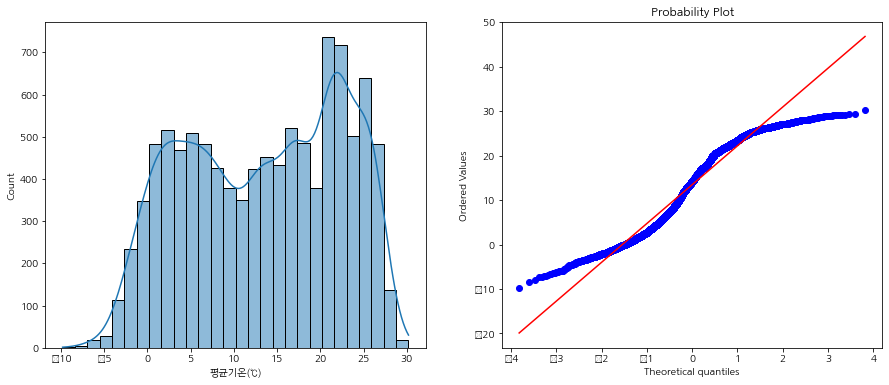

In [118]:
# 다른 방안을 찾아봐야한다.
# 우선 종속변수의 분포를 확인

fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(df3['평균기온(℃)'], ax =axes[0], kde=True)
stats.probplot(df3["평균기온(℃)"], dist='norm', fit=True, plot=axes[1])


# 오른쪽 파란색 곡선이 빨간색 직선에 비슷해 질수록 정규분포를 따른다 ==> 그다지 정확하지는 않지만, 얼추 따른다고 생각

In [119]:
# 정규분포를 대략적으로 따르기 때문에 {sns.histplot(np.log1p(df3["평균기온(℃)"]), kde=True)} 즉, log 변환 필요 X

# 정확도를 높이기 위해 카테고리 피쳐 (year, month) 추가하기 위해 원-핫 인코딩 실시

before_2010 = pd.get_dummies(before_2010, columns=['month'])
after_2010 = pd.get_dummies(after_2010, columns=['month'])

In [120]:
X_train = before_2010.drop(['일시', '평균기온(℃)', '날짜', 'year'], axis = 1)
X_test = after_2010.drop(['일시', '평균기온(℃)', '날짜', 'year'], axis = 1)

y_train = before_2010['평균기온(℃)']
y_test = after_2010['평균기온(℃)']

In [121]:
for m in [SGDRegressor(max_iter=1000), Ridge(alpha = 0.1), 
          Lasso(alpha = 10), LinearRegression()]:
    m.fit(X_train, y_train)
    #print(m.coef_) # 기울기
    #print(m.intercept_) # y절편
    print('train score : ', m.score(X_train, y_train))
    print('test score : ', m.score(X_test, y_test))
    print('=================================================')
    print('')

train score :  -3.140768179575866e+23
test score :  -3.168377670408027e+23

train score :  0.960221097553122
test score :  0.9460108352721256

train score :  0.4264284382419995
test score :  0.4131332349168899

train score :  0.96022115619893
test score :  0.9460125437448956



In [122]:
# 지역을 합쳐서 모델을 만든것이 결과가 좋지 않은 이유라고 생각
# 지역을 나눠서 만든다면? 
# 역시 마찬가지로 score가 그다지 좋은 결과를 안보여준다. 다른 모델생성 필요성
# xgb모델, rnn 모델

In [123]:
x = df1['지점명'].value_counts()
list1 = list(x.index)
list1

['강원특별자치도',
 '서울특별시',
 '인천광역시',
 '경기도',
 '충청남도',
 '충청북도',
 '대전광역시',
 '경상북도',
 '전라북도',
 '대구광역시',
 '울산광역시',
 '광주광역시',
 '부산광역시',
 '경상남도',
 '전라남도',
 '제주도']

In [124]:
# 각 지역별로 따로 저장
for i in list1:
    filter_1 = df1['지점명'] == i
    df1[filter_1].to_csv(i + '.csv')

In [125]:
# 각 지역별 
        
ga = pd.read_csv(list1[0] + '.csv', encoding = 'UTF-8')
se = pd.read_csv(list1[1] + '.csv', encoding = 'UTF-8')
ic = pd.read_csv(list1[2] + '.csv', encoding = 'UTF-8')
ge = pd.read_csv(list1[3] + '.csv', encoding = 'UTF-8')
cn = pd.read_csv(list1[4] + '.csv', encoding = 'UTF-8')
cb = pd.read_csv(list1[5] + '.csv', encoding = 'UTF-8')
dj = pd.read_csv(list1[6] + '.csv', encoding = 'UTF-8')
gb = pd.read_csv(list1[7] + '.csv', encoding = 'UTF-8')
jb = pd.read_csv(list1[8] + '.csv', encoding = 'UTF-8')
da = pd.read_csv(list1[9] + '.csv', encoding = 'UTF-8')
us = pd.read_csv(list1[10] + '.csv', encoding = 'UTF-8')
gw = pd.read_csv(list1[11] + '.csv', encoding = 'UTF-8')
bu = pd.read_csv(list1[12] + '.csv', encoding = 'UTF-8')
gn = pd.read_csv(list1[13] + '.csv', encoding = 'UTF-8')
jn = pd.read_csv(list1[14] + '.csv', encoding = 'UTF-8')
jj = pd.read_csv(list1[15] + '.csv', encoding = 'UTF-8')
# df_4 - 강원
# df_5 - 서울
# df_6 - 인천
# df_7 - 경기
# df_8 - 충남
# df_9 - 충북
# df_10 - 대전
# df_11 - 경북
# df_12 - 전북
# df_13 - 대구
# df_14 - 울산
# df_15 - 광주
# df_16 - 부산
# df_17 - 경남
# df_18 - 전남
# df_19 - 제주

In [126]:
ga

,Unnamed: 0,지점명,일시,평균기온(℃),강수량(mm),평균풍속\n(m/s),평균습도(%rh),일조율(%),year,month
0,0,강원특별자치도,1970-01,-1.2,10.1,4.4,52,64.18,1970,1
1,1,강원특별자치도,1970-02,2.2,58.8,4.3,53,57.52,1970,2
2,2,강원특별자치도,1970-03,2.4,11.8,4.0,53,63.01,1970,3
3,3,강원특별자치도,1970-04,11.4,1.0,3.2,63,49.71,1970,4
4,4,강원특별자치도,1970-05,17.7,78.4,2.7,68,39.01,1970,5
...,...,...,...,...,...,...,...,...,...,...
638,638,강원특별자치도,2023-03,12.1,8.8,2.3,50,61.89,2023,3
639,639,강원특별자치도,2023-04,15.3,33.4,2.6,54,55.96,2023,4
640,640,강원특별자치도,2023-05,20.3,91.1,2.1,59,50.72,2023,5
641,641,강원특별자치도,2023-06,23.2,160.0,2.0,66,49.79,2023,6


In [127]:
ga['날짜'] = ga['일시'].apply(change_day)

In [128]:
filter2 = ga['날짜'] <= 2010
filter3 = ga['날짜'] >= 2010
before_2010 = ga[filter2]
after_2010 = ga[filter3]

In [129]:
before_2010 = pd.get_dummies(before_2010, columns=['month'])
after_2010 = pd.get_dummies(after_2010, columns=['month'])

In [130]:
ga_X_train = before_2010.drop(['Unnamed: 0', '지점명', '일시', '평균기온(℃)', '날짜', 'year'], axis = 1)
ga_X_test = after_2010.drop(['Unnamed: 0', '지점명', '일시', '평균기온(℃)', '날짜', 'year'], axis = 1)

ga_y_train = before_2010['평균기온(℃)']
ga_y_test = after_2010['평균기온(℃)']

In [133]:
for m in [SGDRegressor(max_iter=1000), Ridge(alpha = 0.1), 
          Lasso(alpha = 1), LinearRegression()]:
    m.fit(ga_X_train, ga_y_train)
    print(m.coef_) # 기울기
    print(m.intercept_) # y절편
    print('train score : ', m.score(ga_X_train, ga_y_train))
    print('test score : ', m.score(ga_X_test, ga_y_test))
    print('=================================================')
    print('')

[ 3.01199574e+11 -1.19757188e+11  2.31465557e+11  4.67707281e+10
 -3.03535499e+10  1.34433502e+10  1.14221186e+10  5.85263861e+10
 -5.40335258e+10 -5.95090103e+10  9.34469079e+10 -1.35904391e+10
  3.80952853e+10 -3.21900161e+10 -3.18438912e+10  4.31886402e+09]
[-2.26887366e+09]
train score :  -6.094514758751381e+25
test score :  -4.98718934615967e+25

[-2.35780314e-04 -1.09055335e-01 -3.67106588e-02  5.83053298e-03
 -1.29739044e+01 -1.14238097e+01 -7.06596519e+00 -4.67540233e-01
  4.56230457e+00  8.08095392e+00  1.16734467e+01  1.20500562e+01
  7.58817960e+00  2.33367954e+00 -4.16204396e+00 -1.01953571e+01]
15.295347427273079
train score :  0.9741689389934245
test score :  0.9624821133339577

[ 0.0022511  -0.          0.51097757 -0.00422216 -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.        ]
-19.008947153873855
train score :  0.5870889580535391
test score :  0.50251859752868

[-3.04312154e-04 -7.31257346e-02

In [ ]:
# 각 지역별 월별 예상을 하니 정확도가 높은 것을 알 수 있다.